In [774]:
from bisect import bisect_left
from graphviz import Digraph

In [775]:
class Noeud234:
    def __init__(self, cles, arbres=None, parent=None):
        self.cles = cles      # Liste des clés
        self.arbres = arbres  # Liste des sous-arbres
        self.parent = parent

In [776]:
class Arbre234:
    def __init__(self, noeud=None):
        self.racine = noeud
        self.ecrGauche = None


    def ajout(self, x):
        '''Arbre234 * int -> Arbre234
        Renvoie l'arbre après l'ajout de x'''
        if self.EstVide():
            return Arbre234(Noeud234([x]))
        
        return self.AjoutSimple(x)
    

    def recherche(self, x):
        '''Arbre234 * int -> Arbre234
        Renvoie le sous-arbre contenant x'''
        if self.EstFeuille() and not self.EstDans(x):
            return None
        
        if self.EstDans(x):
            return self
        
        if x < self.Elem(0):
            return self.SsA_i(0).Recherche(x)
        elif self.Degre() == 2 or x < self.Elem(1):
            return self.SsA_i(1).Recherche(x)
        elif self.Degre() == 3 or x < self.Elem(2):
            return self.SsA_i(2).Recherche(x)
        else:
            return self.SsA_i(3).Recherche(x)
        

    def supprime(self, x):
        '''Arbre234 * int -> Arbre234
        Renvoie l'arbre après la suppression de x'''
        if self.EstVide():
            return Arbre234()
            
        if self.EstFeuille():
            if self.Degre() == 2 and self.EstDans(x):
                return Arbre234()
        
        else: # Cas où la fusion est nécessaire entre la racine et ses fils
            G = self.SsA_i(0)
            D = self.SsA_i(1)
            if self.Degre() == 2 and G.Degre() == 2 and D.Degre() == 2:
                self.racine = self.Fusion(G, D)

        return self.SupprimeSimple(x)
    

    def construction(self, liste):
        '''Arbre234 * list -> Arbre234
        Renvoie l'arbre après l'ajout des éléments de la liste'''
        for x in liste:
            self = self.ajout(x)
        return self
    

    def afficher_arbre(self, niveau=0):
        '''Arbre234 * int -> None
        Affiche l'arbre dans le terminal'''
        if self.racine is not None:
            print("  " * niveau, self.Contenu())
            if not self.EstFeuille():
                for sous_arbre in self.SousArbres():
                    sous_arbre.afficher_arbre(niveau + 1)


    def visualiser_arbre(self):
        '''Arbre234 -> None
        Visualise l'arbre avec Graphviz'''
        def creer_label_noeud(A):
            '''Arbre234 -> str'''
            noeud_label = ""
            sections = []

            # Commencer par un espace vide pour les sous-arbres
            sections.append(f' <f0> ')

            # Ajouter les clés et les espaces vides pour les sous-arbres entre chaque clé
            for i, cle in enumerate(A.Contenu()):
                sections.append(f' <f{i*2+1}> {str(cle)} ')
                sections.append(f' <f{i*2+2}> ')

            noeud_label = '|'.join(sections)
            return noeud_label
        
        def ajouter_noeuds_et_arcs(A, graph, parent_id=None, parent_port=''):
            '''Arbre234 * Digraph * str * str -> None'''
            if A.EstVide():
                return
            
            noeud_label = creer_label_noeud(A)
            noeud_id = f'node{abs(hash(A)) % (10 ** 8)}'  # Génère un ID unique plus court
            graph.node(noeud_id, label=noeud_label)

            if parent_id is not None and parent_port != '':
                graph.edge(f'{parent_id}:{parent_port}', noeud_id)

            if A.EstFeuille():
                return

            sous_arbres = A.SousArbres()
            for i, arbre in enumerate(sous_arbres):
                port = f'f{i*2}'  # Connecter aux ports des sous-arbres
                ajouter_noeuds_et_arcs(arbre, graph, noeud_id, port)

        g = Digraph('G', node_attr={'shape': 'record', 'height': '.1'})
        ajouter_noeuds_et_arcs(self, g)
        return g

## Primitive

In [777]:
def EstVide(self):
    '''Arbre234 -> bool'''
    return self.racine is None


def EstFeuille(self):
    '''Arbre234 -> bool'''
    return self.SousArbres() is None


def Contenu(self):
    '''Arbre234 -> list[int]
    Retourne la liste des clés de l'arbre'''
    return self.racine.cles


def SousArbres(self):
    '''Arbre234 -> list[Arbre234]
    Retourne la liste des sous-arbres de l'arbre'''
    return self.racine.arbres
    

def Pere(self):
    '''Arbre234 -> Arbre234'''
    return self.racine.parent


def Degre(self):
    '''Arbre234 -> int'''
    return len(self.Contenu()) + 1


def SsA_i(self, i):
    '''Arbre234 * int -> Arbre234
    Retourne le i-ème sous-arbre de l'arbre'''
    if (i >= 0 and i <= 3):
        return self.SousArbres()[i]


def EstDans(self, x):
    '''Arbre234 * int -> bool'''
    return x in self.Contenu()


def Elem(self, i):
    '''Arbre234 * int -> int
    Retourne la i-ème clé de l'arbre'''
    if (i >= 0 and i <= 2):
        return self.Contenu()[i]
    

def Index(self):
    '''Arbre234 -> int
    Retourne la position de l'arbre dans son père'''
    if self.Pere() is None:
        return -1
    
    return self.Pere().SousArbres().index(self)


def Dupplique(self, parent=None):
    '''Arbre234 -> Arbre234
    Retourne une copie de l'arbre'''
    if self.EstFeuille():
        return Arbre234(Noeud234(self.Contenu().copy(), parent=parent))
    
    A = Arbre234()
    sous_arbres = []
    contenus = self.Contenu().copy()
    for i in range(self.Degre()):
        sous_arbres.append(self.SsA_i(i).Dupplique(A))
    A.racine = Noeud234(contenus, sous_arbres, parent)
    return A


def InsertionTrie(self, x):
    '''Arbre234 * int -> None
    Insère x dans la liste des clés de l'arbre'''
    indice = bisect_left(self.Contenu(), x)
    self.Contenu().insert(indice, x)
    return indice


# Ajout des fonctions aux méthodes de la classe Arbre234
Arbre234.EstVide = EstVide
Arbre234.EstFeuille = EstFeuille
Arbre234.Contenu = Contenu
Arbre234.SousArbres = SousArbres
Arbre234.Pere = Pere
Arbre234.Degre = Degre
Arbre234.SsA_i = SsA_i
Arbre234.EstDans = EstDans
Arbre234.Elem = Elem
Arbre234.Index = Index
Arbre234.Dupplique = Dupplique
Arbre234.InsertionTrie = InsertionTrie

## Fonction auxiliaire ajout

In [778]:
def AjoutSimple(self, x, parent=None):
    '''Arbre234 * int * Arbre234-> Arbre234'''
    if self.EstDans(x):
        return self.Dupplique(parent)
    
    if self.Degre() == 4:
        self.racine = self.EcR(x, parent)

    if self.EstFeuille():
        A = self.Dupplique(parent)
        A.InsertionTrie(x)
        return A
    
    A = Arbre234(Noeud234(self.Contenu().copy(), [], parent))
    indice = bisect_left(A.Contenu(), x)

    # On dupplique les sous arbres sauf celui qui va être modifié
    for (i, a) in enumerate(self.SousArbres()):
        if i != indice:
            A.SousArbres().append(a.Dupplique(A))
        else:
            SousA = a.AjoutSimple(x, A)
            if A.ecrGauche:
                A.ecrGauche = None # Insère x dans le fils gauche après éclatement
                A.SousArbres().insert(indice, SousA)
            else:
                A.SousArbres().append(SousA) # Insère x dans le fils droit après éclatement       
    return A

def EcR(self, x, parent=None):
    '''Arbre234 -> Noeud234
    Effectue un éclatement'''
    G = Arbre234()
    D = Arbre234()

    if self.EstFeuille():
        G.racine = Noeud234([self.Elem(0)], parent=parent)
        D.racine = Noeud234([self.Elem(2)], parent=parent)

    else:
        G.racine = Noeud234([self.Elem(0)], [self.SsA_i(0), self.SsA_i(1)], parent=parent)
        D.racine = Noeud234([self.Elem(2)], [self.SsA_i(2), self.SsA_i(3)], parent=parent)
        self.SsA_i(0).racine.parent = G
        self.SsA_i(1).racine.parent = G
        self.SsA_i(2).racine.parent = D
        self.SsA_i(3).racine.parent = D

    if parent is None: # Eclatement à la racine
        return Noeud234([self.Elem(1)], [G, D])
    
    # Eclatement d'un noeud autre que la racine
    indice = parent.InsertionTrie(self.Elem(1))
    if x < self.Elem(1):
        D.racine.parent = parent
        parent.SousArbres().insert(indice, D)
        parent.ecrGauche = True
        return G.racine
    
    G.racine.parent = parent
    parent.SousArbres().insert(indice, G)
    return D.racine

# Ajout des fonctions aux méthodes de la classe Arbre234
Arbre234.EcR = EcR
Arbre234.AjoutSimple = AjoutSimple

## Fonction auxiliaire supprime

In [779]:
def SupprimeSimple(self, x, parent=None):
    '''Arbre234 * int -> Arbre234
    Renvoie l'arbre après la suppression de x à la racine'''
    if self.EstFeuille():
        if self.EstDans(x):
            if self.Degre() > 2:
                A = self.Dupplique(parent)
                A.Contenu().remove(x)
                return A # OK
            
            else:
                VG = self.VoisinGauche()
                VD = self.VoisinDroit()
                if VG is None:
                    if VD is None: # Cas où l'arbre est la racine avec qu'un élément, déjà traité dans supprime
                        pass
                    
                    else:
                        if VD.Degre() > 2: # Cas où l'arbre est le plus à gauche et qu'il peut emprunter à son voisin droit
                            monte = VD.Min()
                            self.MiseAJour(VD, 0, monte) # OK

                        else:  # Cas où self est le plus à gauche et qu'il ne peut pas emprunter
                            self.racine = parent.Fusion(self, VD, 0) # OK

                else:
                    if VG.Degre() > 2: # Cas où self peut emprunter à son voisin gauche
                        monte = VG.Max()
                        self.MiseAJour(VG, VG.Index(), monte) # OK

                    else:
                        if VD is None: # Cas où self est le plus à droite et qu'il ne peut pas emprunter
                            self.racine = parent.Fusion(VG, self, VG.Index()) # OK

                        else:
                            if VD.Degre() > 2: # Cas où self peut emprunter à son voisin droit et qu'il ne peut pas emprunter à son voisin gauche
                                monte = VD.Min()
                                self.MiseAJour(VD, self.Index(), monte) # OK

                            else: # Cas où self ne peut pas emprunter à ses voisins
                                self.racine = parent.Fusion(VG, self, VG.Index()) # OK
                                
                return self.SupprimeSimple(x, parent)
                        
        else: # x n'a pas été trouvé
            return self.Dupplique(parent)
    
    else:
        A = Arbre234(Noeud234(self.Contenu().copy(), [], parent))
        if self.EstDans(x):
            indice = A.Contenu().index(x)
            for (_, a) in enumerate(self.SousArbres()):
                A.SousArbres().append(a.Dupplique(A))

            G = A.SsA_i(indice)
            D = A.SsA_i(indice + 1)
            if not G.ArbreMinimal():
                max = G.Max()
                A.Contenu()[indice] = max
                A.SousArbres()[indice] = G.SupprimeSimple(max, A)

            elif not D.ArbreMinimal():
                min = D.Min()
                A.Contenu()[indice] = min
                A.SousArbres()[indice + 1] = D.SupprimeSimple(min, A)

            else:
                D.racine = A.Fusion(G, D, indice)
                A.SousArbres()[indice] = D.SupprimeSimple(x, A)

        else:
            indice = bisect_left(A.Contenu(), x)
            indiceNonMinimal = None
            for (i, a) in enumerate(self.SousArbres()):
                if i != indice:
                    A.SousArbres().append(a.Dupplique(A))
                    if not a.ArbreMinimal():
                        indiceNonMinimal = i
                else:
                    a.racine.parent = A
                    A.SousArbres().append(a)
            
            sousA = A.SsA_i(indice)
            if sousA.ArbreMinimal() and not sousA.EstFeuille():
                if indiceNonMinimal is None:
                    A.SousArbres()[0].racine = A.Fusion(A.SousArbres()[0], A.SousArbres()[1], 0)
                    return A.SupprimeSimple(x, parent)

                if indiceNonMinimal > indice:
                    for i in range(indiceNonMinimal, indice, -1):
                        VD = A.SsA_i(i)
                        min = VD.Min()
                        cleATransferer = A.Contenu()[i-1]
                        A.SousArbres()[i] = VD.SupprimeSimple(min, A)
                        A.Contenu()[i-1] = min
                        A.SousArbres()[i-1] = A.SousArbres()[i-1].AjoutSimple(cleATransferer, A).SupprimeSimple(x, A)
                else:
                    for i in range(indiceNonMinimal, indice):
                        VG = A.SsA_i(i)
                        max = VG.Max()
                        cleATransferer = A.Contenu()[i]
                        A.SousArbres()[i] = VG.SupprimeSimple(max, A)
                        A.Contenu()[i] = max
                        A.SousArbres()[i+1] = A.SousArbres()[i+1].AjoutSimple(cleATransferer, A).SupprimeSimple(x, A)
                return A      

            sousA = A.SsA_i(indice).SupprimeSimple(x, A)
            indice = bisect_left(A.Contenu(), sousA.Min()) # On a retiré un arbre lors de l'éclatement
            A.SousArbres()[indice] = sousA

        return A


def MiseAJour(self, V, i, monte):
    descend = self.Pere().Contenu()[i]
    V.Contenu().remove(monte)
    self.Pere().Contenu()[i] = monte
    self.Contenu().append(descend)


def ArbreMinimal(self):
    if self.EstFeuille():
        return self.Degre() == 2
    else:
        if self.Degre() == 2:
            return self.SsA_i(0).ArbreMinimal() and self.SsA_i(1).ArbreMinimal()
        else:
            return False
        

def Fusion(self, G, D, i=None):
    g = G.Elem(0)
    d = D.Elem(0)
    sous_arbres = None

    if not G.EstFeuille():
        sous_arbres = [G.SsA_i(0), G.SsA_i(1), D.SsA_i(0), D.SsA_i(1)]

    if self.Pere() is None and self.Degre() == 2:
        return Noeud234([g, self.Elem(0), d], sous_arbres)
    
    p = self.Elem(i)
    self.SousArbres().remove(G)
    self.Contenu().remove(p)
    return Noeud234([g, p, d], sous_arbres, self)


def Min(self):
    '''Arbre234 -> int
    Retourne la plus petite clé de l'arbre'''
    if self.EstFeuille():
        return self.Elem(0)
    
    return self.SsA_i(0).Min()


def Max(self):
    '''Arbre234 -> int
    Retourne la plus grande clé de l'arbre'''
    if self.EstFeuille():
        return self.Elem(self.Degre() - 2)
    
    return self.SsA_i(self.Degre() - 1).Max()


def VoisinGauche(self):
    '''Arbre234 -> Arbre234'''
    position = self.Index()

    if position == 0 or position == -1:
        return None
    
    return self.Pere().SsA_i(position - 1)


def VoisinDroit(self):
    '''Arbre234 -> Arbre234'''
    position = self.Index()
    lePlusADroite = self.Pere().Degre() - 1

    if position == lePlusADroite or position == -1:
        return None
    
    return self.Pere().SsA_i(position + 1)


# Ajout des fonctions aux méthodes de la classe Arbre234
Arbre234.SupprimeSimple = SupprimeSimple
Arbre234.MiseAJour = MiseAJour
Arbre234.ArbreMinimal = ArbreMinimal
Arbre234.Fusion = Fusion
Arbre234.Min = Min
Arbre234.Max = Max
Arbre234.VoisinGauche = VoisinGauche
Arbre234.VoisinDroit = VoisinDroit

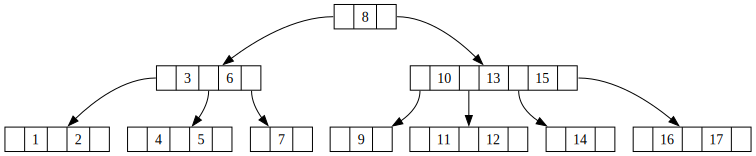

In [780]:
A = Arbre234()
A = A.ajout(8)
A = A.ajout(3)
A = A.ajout(2)
A = A.ajout(4)
A = A.ajout(1)
A = A.ajout(15)
A = A.ajout(10)
A = A.ajout(9)


A = A.ajout(11)
A = A.ajout(7)
A = A.ajout(6)
A = A.ajout(13)
A = A.ajout(12)
A = A.ajout(5)
A = A.ajout(14)
A = A.ajout(16)
A = A.ajout(17)

A.visualiser_arbre()

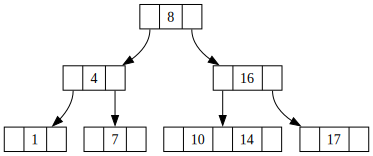

In [781]:
A = A.supprime(6)
A = A.supprime(5)
A = A.supprime(3)
A = A.supprime(2)
A = A.supprime(9)
A = A.supprime(11)
A = A.supprime(13)
A = A.supprime(15)
A = A.supprime(12)
# A = A.supprime(14)

A.visualiser_arbre()

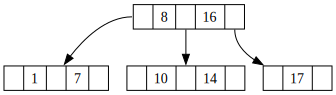

In [782]:
A = A.supprime(4)

A.visualiser_arbre()

## Test avec un grand arbre

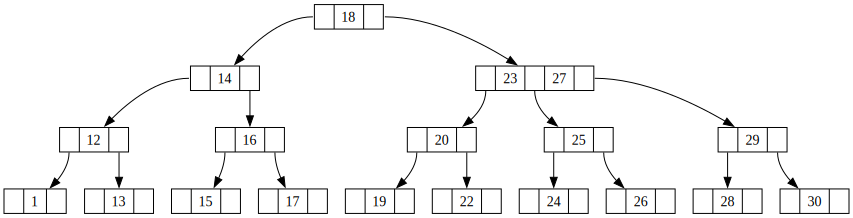

In [783]:
B = Arbre234()
B = B.construction([8, 3, 2, 4, 1, 15, 10, 9, 11, 7, 6, 13, 12, 5, 14, 16, 17, 25, 30, 22, 23, 24, 26, 27, 28, 29, 18, 19, 20, 21])
B = B.supprime(6)
B = B.supprime(3)
B = B.supprime(11)
B = B.supprime(2)
B = B.supprime(4)

B = B.supprime(10)
B = B.supprime(9)
B = B.supprime(7)
B = B.supprime(8)
B = B.supprime(5)
B = B.supprime(21)
# B = B.supprime(30)

B.visualiser_arbre()


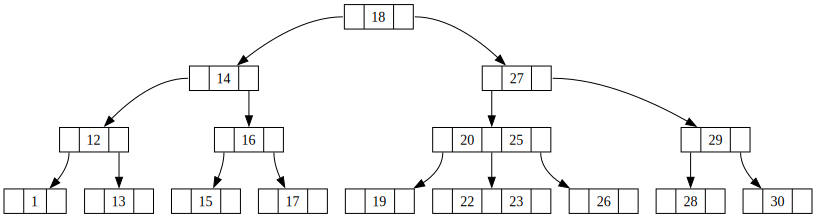

In [784]:
B = B.supprime(24)

B.visualiser_arbre()

In [785]:
def papa(A):
    if A.Pere() is not None:
        print(A.Contenu(), A.Pere().Contenu())
    if not A.EstFeuille():
        for (i, a) in enumerate(A.SousArbres()):
            papa(a)

papa(B)

[14] [18]
[12] [14]
[1] [12]
[13] [12]
[16] [14]
[15] [16]
[17] [16]
[27] [18]
[20, 25] [27]
[19] [20, 25]
[22, 23] [20, 25]
[26] [20, 25]
[29] [27]
[28] [29]
[30] [29]
